**Task:** Given basic information (ID, age, gender, income, spending score) about the customers, identify clusters of customers within the data. 


**Part 1: Exploratory Data Analysis** - It is important to develop a basic understanding of your data to avoid making invalid assumptions about the data and analyse clusters more accurately and effeciently in your clustering analysis.

**Import libraries and data**

In [ ]:
#Importing libraries

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import missingno as msno

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
#from sklearn.cluster import DBSCAN
from sklearn import metrics
#from sklearn.datasets import make_blobs
#from sklearn.preprocessing import StandardScaler

#import warnings 
#warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
#Importing Data - Please download the csv file "Mall_Customers.csv" onto your computer before running this code
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv'])) #convert the csv file into a dataframe
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


**Gain a deeper understanding of your data**

In [ ]:
#Preview Data
df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#View some summary statistics for the data
df.describe()



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#More information on the data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Identify if there are missing values in the data
msno.bar(df)
plt.show()

In [ ]:
#Drop columns in data that are not useful for your analysis
df.drop('CustomerID', axis = 1, inplace = True)

Visualise your data with the help of distribution plots.
It is important to develop a basic understanding of your data before making any assumptions about it. Try to identify patterns between variables in the data as you plot. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

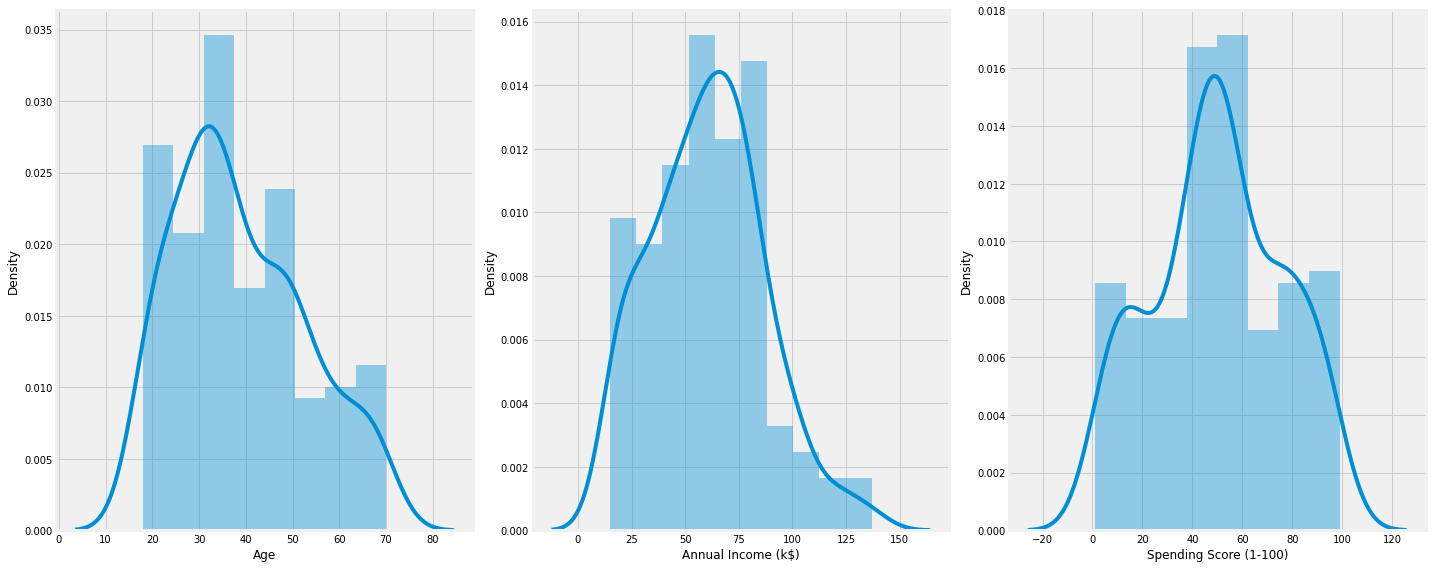

In [ ]:
#Using Distribution Plots to analyse data
plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.distplot(df[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

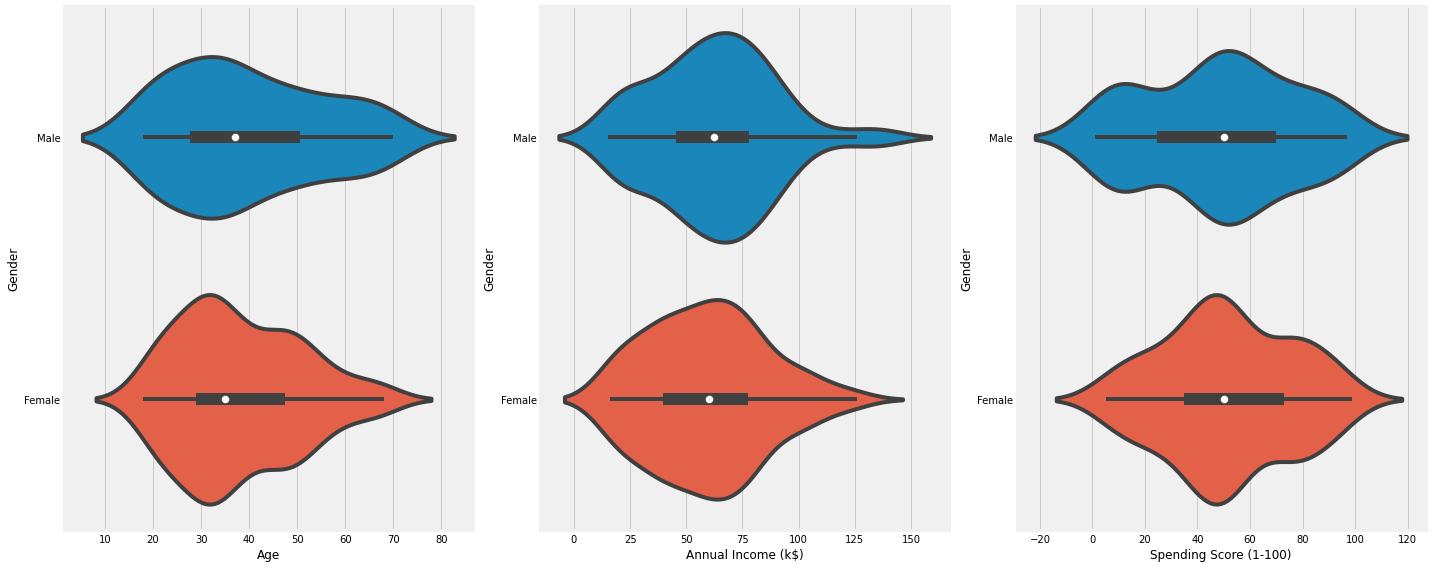

In [ ]:
#Violin Plot
plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.violinplot(x = col, y = 'Gender', data = df)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

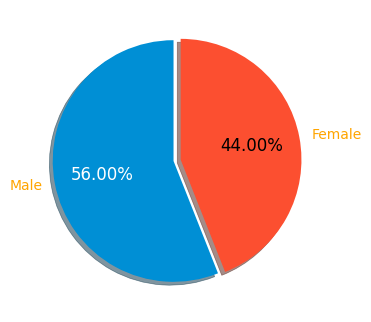

In [ ]:
#More Distribution Plots
#Pie plot for 'Gender'
values = df['Gender'].value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize = (4, 4), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'orange')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

In [ ]:
#Bar Graph for 'Age' 
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 55]

x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]

px.bar(data_frame = df, x = x_age, y = y_age, color = x_age,
       title = 'Number of customers per age group')

In [ ]:
#Scatter Plot
px.scatter(data_frame = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
          title = 'Relation between Annual Income and Spending Score')

In [ ]:
#Try it yourself! 
#Try to create some bar graphs or some other plot of your choice to visualise the relationship between some variables in the data

**Part 2: K-means Clustering**

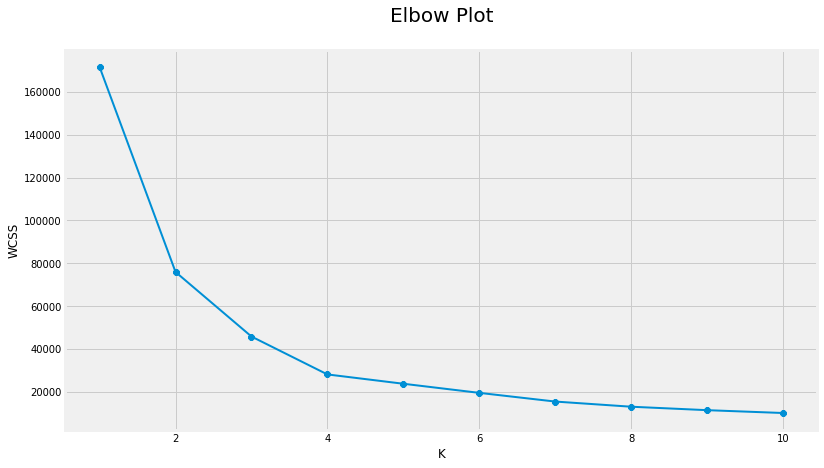

In [ ]:
#You may select all the variables or a subset of them to perform clustering
#In this example, we will perform K means on small groups of two variables and at the end we will do so on all three variables

#Age and Spending Score

#To determine optimal number of clusters in data, we can perform the elbow method:

#Subset of data that we want to perform K means on 
X1 = df.loc[:, ['Age', 'Spending Score (1-100)']].values

#Perform K means and Calculate within cluster sum of squares (wcss) or intra-cluster variance for number of clusters between the range of 1 to 10
wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1) 
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()  

Within cluster sum of squares (WCSS) or intra cluster variance is the sum of squared distance between each data point and the centroid in a cluster. The centroid is the midpoint of a cluster. When we plot the WCSS with the K value (K = number of clusters), the plot will appear to take the shape of an elbow. This is becase as the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

In [ ]:
#Perform K means based on optimal number of clusters identified and print the cluster number assigned to each datapoint
kmeans = KMeans(n_clusters = 4)
labels = kmeans.fit_predict(X1)
print(labels)

[3 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 3 3 1 0 3 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1
 0 1 0 2 0 2 3 1 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 0 3 0 2 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 2 0
 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 3
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [ ]:
#Print cluster centres according to variables identified (x-axis: Age, y-axis: Spending Score)
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


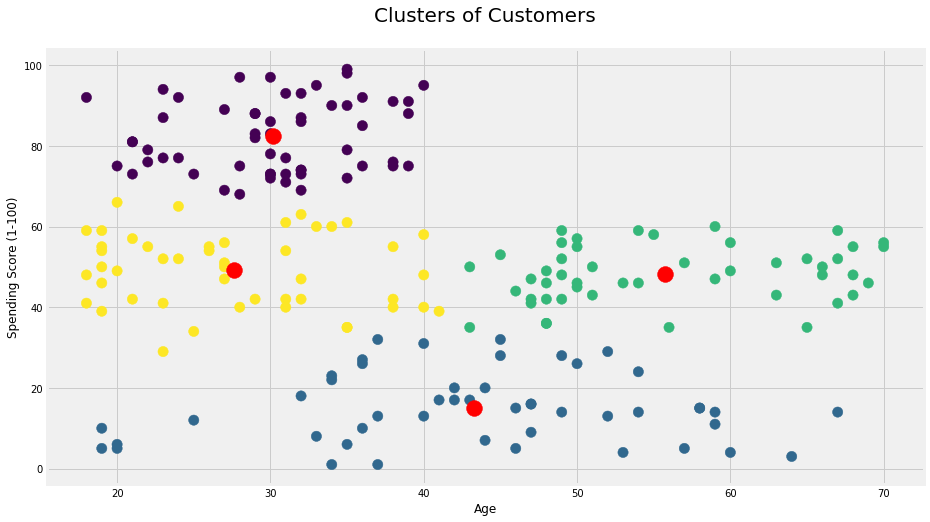

In [ ]:
#Color-coded scatter plot to visualize clusters
plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


**Clusters we have identified**: Approximately 50% of younger customers aged 30 years on average are high spenders, whereas the other 50% are midrange spenders. Another group of midrange spenders identified are senior customers aged 55 on average. The lowest spenders are middle aged customers aged 43 on average, however, the cluster is much more spread out and we have some outliers. 

**Try it yourself!**: Using the guide above, perform K means on other set of variables in the data and form your own interpretations of the clusters. We will compare our results with our peers later :) 

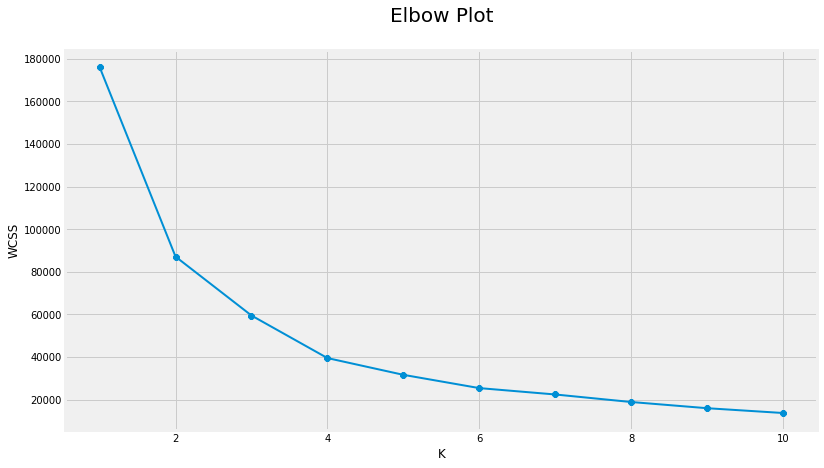

In [ ]:
#Age and Annual Income

#Elbow Plot
X2 = df.loc[:, ['Age', 'Annual Income (k$)']].values

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Perform Kmeans and print the cluster number assigned to each datapoint
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(X2)
print(labels)

[0 0 0 0 0 0 0 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 3 0 3 0 0
 0 0 0 3 0 3 0 3 0 3 0 0 0 3 0 0 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [ ]:
#Print cluster centres
print(kmeans.cluster_centers_)

[[ 29.53658537  27.24390244]
 [ 38.25862069  78.15517241]
 [ 25.06451613  59.48387097]
 [ 56.62        48.48      ]
 [ 36.6        109.7       ]]


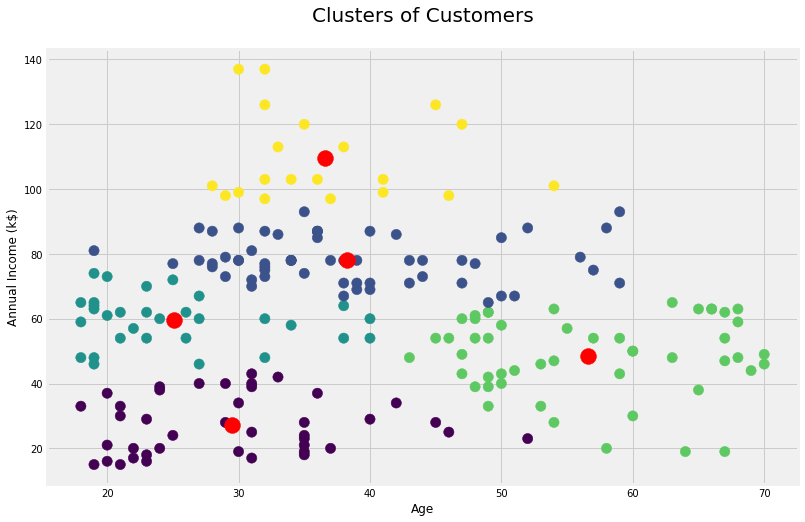

In [ ]:
#Color-coded scatter plot to visualize clusters
plt.figure(figsize = (12, 8))

plt.scatter(X2[:, 0], X2[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

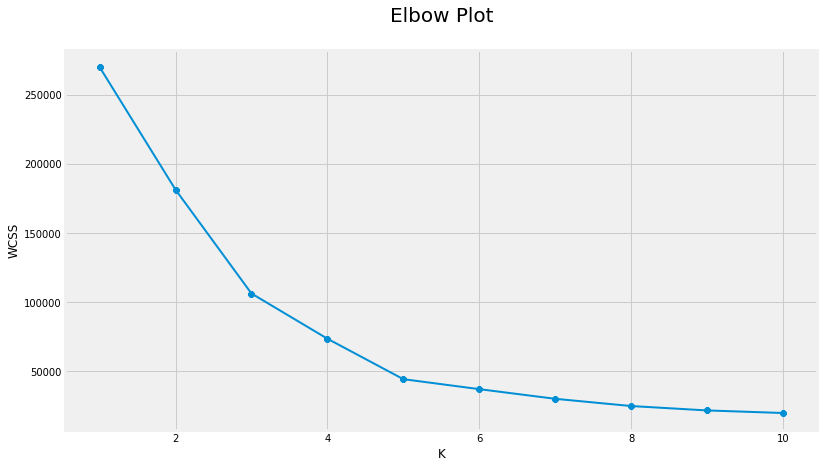

In [ ]:
#Annual Income and Spending Scores

#Elbow Method
X3 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Perform Kmeans and print the cluster number assigned to each datapoint
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(X3)
print(labels)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [ ]:
#Print cluster centres
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


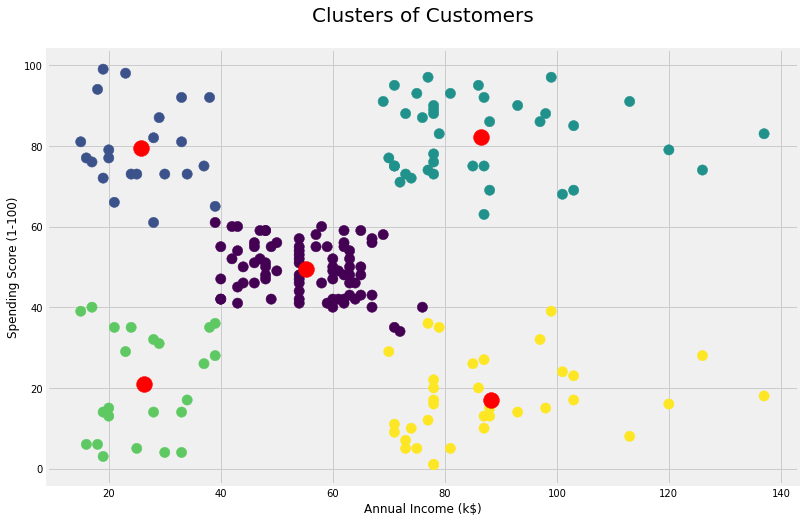

In [ ]:
#Color-coded scatter plot to visualize clusters
plt.figure(figsize = (12, 8))

plt.scatter(X3[:, 0], X3[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

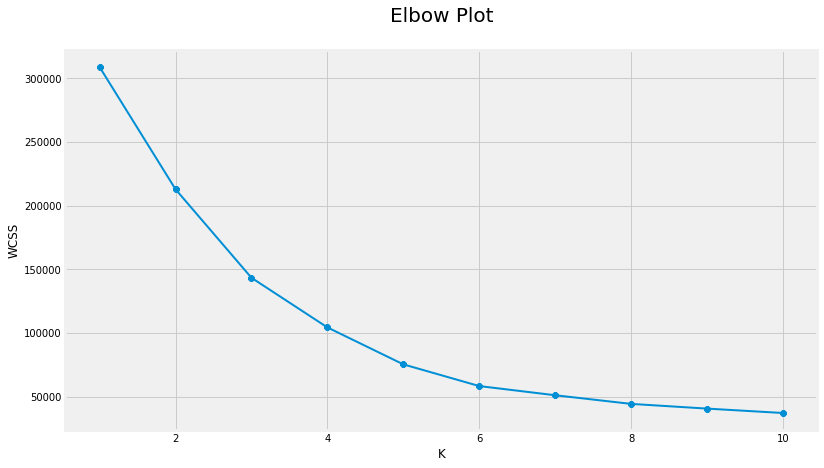

In [ ]:
#All three variables

#Elbow Method
X4 = df.iloc[:, 1:]

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Perform Kmeans
kmeans = KMeans(n_clusters = 6)
clusters = kmeans.fit_predict(X4)
X4['label'] = clusters

In [ ]:
#Color-coded scatter plot to visualize clusters
fig = px.scatter_3d(X4, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color = 'label', size = 'label')
fig.show()

**Part 3: Hierarchical Clustering**

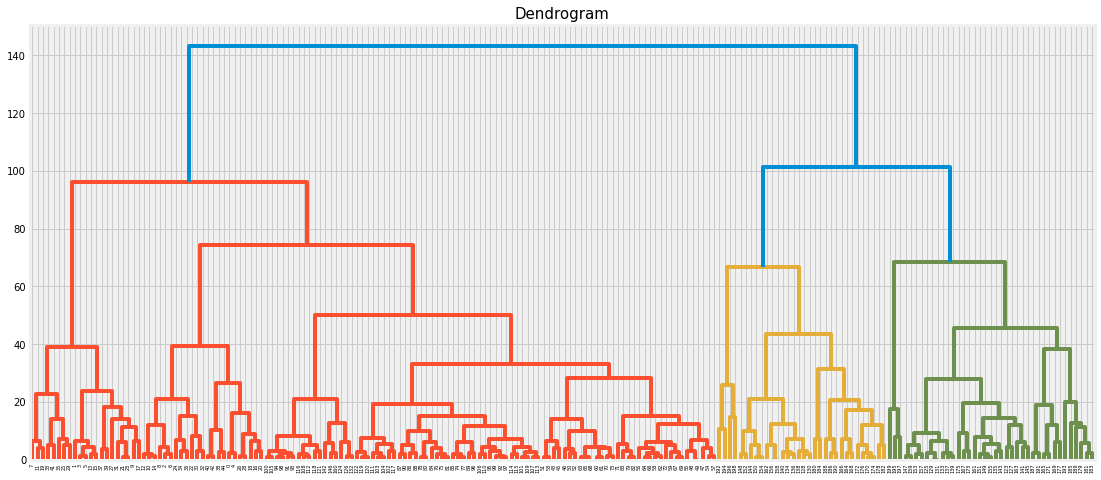

In [ ]:
#Plot dendrograms to see how clusters merge together
plt.figure(figsize = (17, 8))

dendo = dendrogram(linkage(X3, method = 'complete')) #try 'average', 'single', 'complete' --> these methods may yield different results 
#explore: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html for more methods   
plt.title('Dendrogram', fontsize = 15)
#add this code after you have determined how you want to cut the dendrogram --> replace y with the height of the dendrogram at which you would like to draw a horizontal line
#plt.axhline(y = 35, color = 'r', linestyle = '-') 

plt.show() 


To identify the optimal number of clusters via a dendrogram, we look at the space that contains the longest vertical lines. A longer vertical line between different levels of merging of clusters represents more separation between the clusters. Hence, the clusters are more robust. Once we identify that space, we can draw a horizontal line across the space. The number vertical lines that the horizontal line crosses determines the number of clusters. 


In [ ]:
#Perform Hierarchical Agglomerative Clustering
agc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete') #modify n_clusters value according to the number of clusters you have obtained from your dendrogram
#explore: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html for different distance measures and linkage methods
labels = agc.fit_predict(X3)

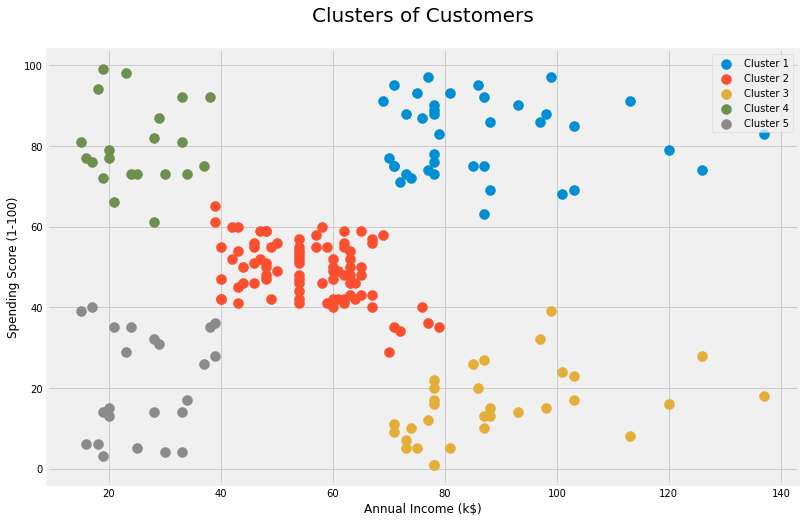

In [ ]:
#Color-coded scatter plot to visualize clusters
plt.figure(figsize = (12, 8))

plt.scatter(X3[labels == 0,0], X3[labels == 0,1], label = 'Cluster 1', s = 100)
plt.scatter(X3[labels == 1,0], X3[labels == 1,1], label = 'Cluster 2', s = 100)
plt.scatter(X3[labels == 2,0], X3[labels == 2,1], label = 'Cluster 3', s = 100)
plt.scatter(X3[labels == 3,0], X3[labels == 3,1], label = 'Cluster 4', s = 100)
plt.scatter(X3[labels == 4,0], X3[labels == 4,1], label = 'Cluster 5', s = 100)
#plt.scatter(X3[labels == 5,0], X3[labels == 5,1], label = 'Cluster 6', s = 100)
#plt.scatter(X3[labels == 6,0], X3[labels == 6,1], label = 'Cluster 7', s = 100)


plt.legend(loc = 'best')
plt.title('Clusters of Customers\n ', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()